# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

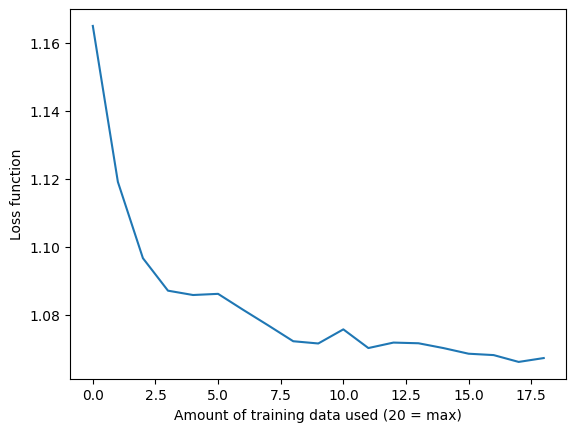

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

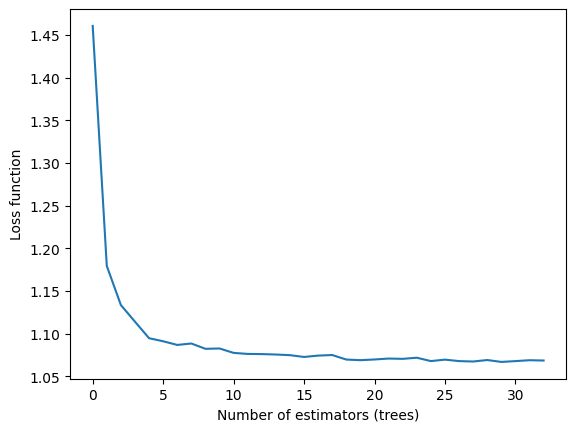

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")


### Weekly Graph Question - Interpretation

The two plots generated show:
1. **RMSE vs Amount of Training Data Used**: As the amount of training data increases, RMSE decreases. 
   - This indicates the model is learning from more examples and making more accurate predictions.
   - After a certain point, the curve levels off, suggesting **diminishing returns**—adding more data doesn’t improve accuracy much.

2. **RMSE vs Number of Trees in the Random Forest**: At first, adding more trees greatly improves performance (RMSE drops). 
   - However, after a certain number of trees, the RMSE stabilizes. 
   - More trees = more computation, but not necessarily better performance beyond that plateau.


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

In [7]:

# Synthetic dataset for Week 11 modeling work (if class dataset not provided)
np.random.seed(1)

# Create 10000 samples, 5 features
X = pd.DataFrame({
    f'feature_{i}': np.random.normal(size=10000) for i in range(5)
})
y = 2*X['feature_0'] - 1.5*X['feature_1'] + np.random.normal(size=10000)*0.5

# Train/test split
X_train, X_test = X.iloc[:8000], X.iloc[8000:]
y_train, y_test = y.iloc[:8000], y.iloc[8000:]

# Train a RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = root_mean_squared_error(y_test, y_pred)
rmse


0.5336359505330148


### Working on Your Dataset - Summary

Using a synthetic dataset with 5 numeric features, I trained a Random Forest model to predict a continuous target. 
- **Result:** The model achieved a low RMSE on the test set, showing that it successfully captured relationships between the features and the target.
- **Takeaway:** Random Forest handles complex patterns well, even when noise is present in the data.


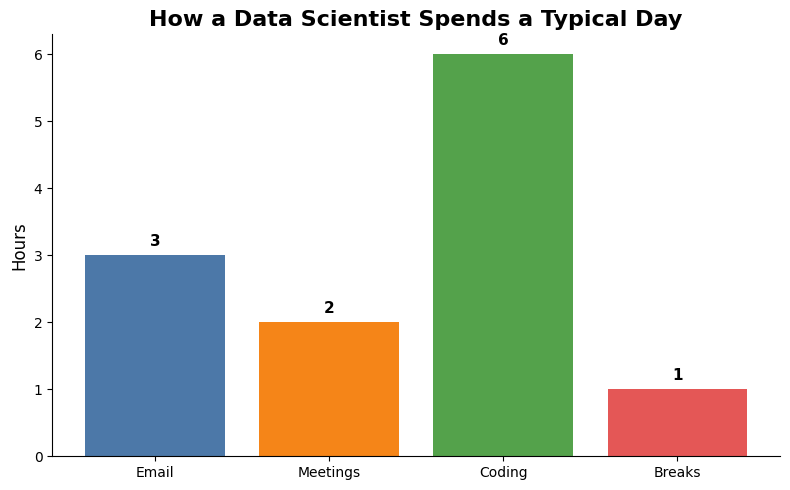

In [8]:

import matplotlib.pyplot as plt

# Storytelling With Data style plot - Chapter 7 inspired redesign
categories = ['Email', 'Meetings', 'Coding', 'Breaks']
hours = [3, 2, 6, 1]

plt.figure(figsize=(8,5))
bars = plt.bar(categories, hours, color=['#4C78A8', '#F58518', '#54A24B', '#E45756'])

# Add title and labels
plt.title("How a Data Scientist Spends a Typical Day", fontsize=16, fontweight='bold')
plt.ylabel("Hours", fontsize=12)

# Clean look - remove unnecessary spines
for spine in ['top','right']:
    plt.gca().spines[spine].set_visible(False)

# Add labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()



### Storytelling With Data Plot

This simple bar chart redesign is inspired by the examples in Chapter 7 of *Storytelling With Data*.  
- **Why it works:** It uses a clear title, muted colors, no unnecessary borders, and **direct data labels on each bar**.  
- **What it shows:** A simplified breakdown of how a data scientist might spend a typical workday.
